# Linear Regression using scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from utils import load_house_data

np.set_printoptions(precision=2)

## Gradient Descent

### Load dataset

In [ ]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)', '#bedrooms', '#floors', 'age']

### Scale/Normalize training data

In [3]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw         X: {np.ptp(X_train, axis=0)}")
print(f"Peak to Peak range by column in Normalized  X: {np.ptp(X_norm, axis=0)}")


Peak to Peak range by column in Raw         X: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized  X: [5.85 6.14 2.06 3.69]


### Create and fit regression model

In [4]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 111, number of weight updates: 10990.0


### View parameters

In [5]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_

print(f"model parameters:                   w: {w_norm}, b: {b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [109.84 -20.97 -32.36 -38.09], b: [363.13]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


### Make predictions

In [6]:
y_pred_sgd = sgdr.predict(X_norm)

y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set: {y_pred[:4]}")
print(f"Target values             : {y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set: [295.19 485.69 389.5  491.85]
Target values             : [300.  509.8 394.  540. ]


### Plot results

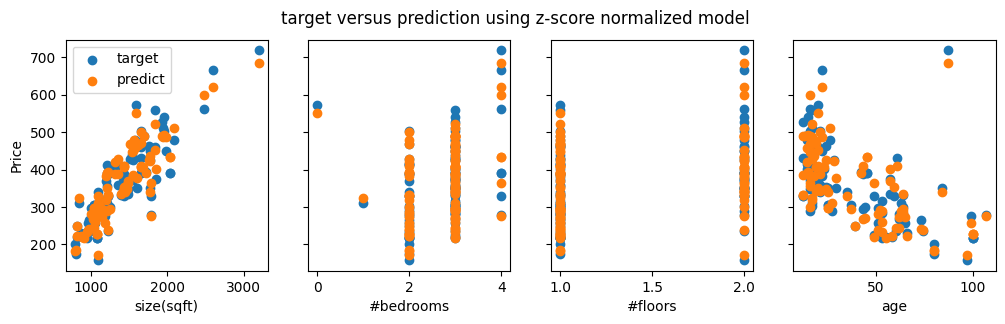

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label='target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], y_pred, label='predict')
ax[0].set_ylabel("Price")
fig.suptitle("target versus prediction using z-score normalized model")

ax[0].legend()
plt.show()